# Task 2
## Predictive modeling of customer bookings
### Exploratory data analysis

In [ ]:
# importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [95]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [96]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [97]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [98]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [99]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

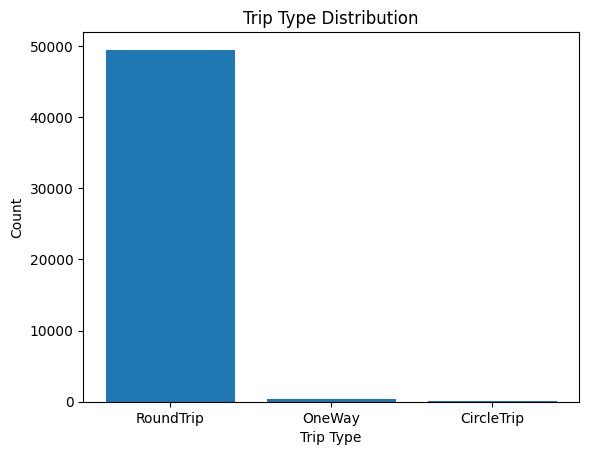

In [100]:
import matplotlib.pyplot as plt

counts = df['trip_type'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Trip Type")
plt.ylabel("Count")
plt.title("Trip Type Distribution")
plt.show()

RoundTrip has significantly higher counts than OneWay and CircleTrip, indicating that possibly most travelers prefer RoundTrip tickets, likely because they offer convenience and cost savings compared to booking separate one-way trips.

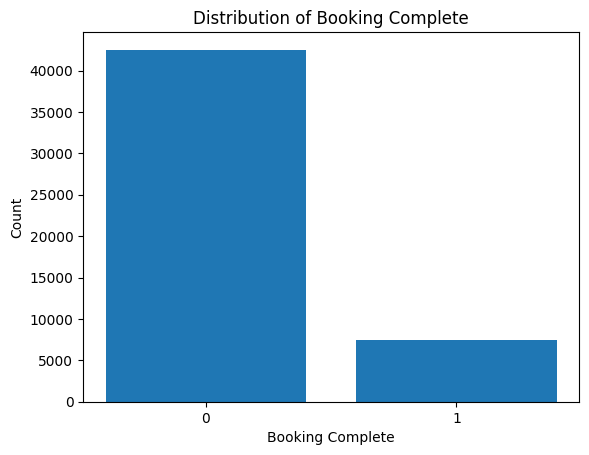

In [101]:
target_counts = df['booking_complete'].value_counts()

# Plot bar chart
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.xlabel("Booking Complete")
plt.ylabel("Count")
plt.title("Distribution of Booking Complete")
plt.show()

Most bookings are complete.

### Data Cleaning

In [102]:
# Checking for null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [103]:
# Checking for duplicates
df.duplicated().sum()

719

In [104]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [105]:
# Checking the unique values in Categorical columns.
cat_cols = df.select_dtypes("object")

for col in cat_cols:
    print(f"\nUnique values for '{col}':")
    print(df[col].unique(), f"\nUnique count: {df[col].nunique()}")


Unique values for 'sales_channel':
['Internet' 'Mobile'] 
Unique count: 2

Unique values for 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay'] 
Unique count: 3

Unique values for 'flight_day':
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri'] 
Unique count: 7

Unique values for 'route':
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPE

In [106]:
# Label Encoding the categorical variables.
from sklearn.preprocessing import LabelEncoder

# Create label encoder instance
le = LabelEncoder()

# One-Hot Encoding for 'trip_type'
df = pd.get_dummies(df, columns=['trip_type'], drop_first=True)

# Label encoding the categorical columns (excluding 'trip_type')
for col in cat_cols:
    if col != 'trip_type':  # Skip 'trip_type' column
        df[col] = le.fit_transform(df[col])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  int32  
 2   purchase_lead          49281 non-null  int64  
 3   length_of_stay         49281 non-null  int64  
 4   flight_hour            49281 non-null  int64  
 5   flight_day             49281 non-null  int32  
 6   route                  49281 non-null  int32  
 7   booking_origin         49281 non-null  int32  
 8   wants_extra_baggage    49281 non-null  int64  
 9   wants_preferred_seat   49281 non-null  int64  
 10  wants_in_flight_meals  49281 non-null  int64  
 11  flight_duration        49281 non-null  float64
 12  booking_complete       49281 non-null  int64  
 13  trip_type_OneWay       49281 non-null  bool   
 14  trip_type_RoundTrip    49281 non-null  bool   
dtypes: bool

In [108]:
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

In [ ]:
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalising the features 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation on the training data
cv_results_accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_results_accuracy.mean():.4f}")

Cross-validated Accuracy: 0.8484


In [110]:
# Training the model
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

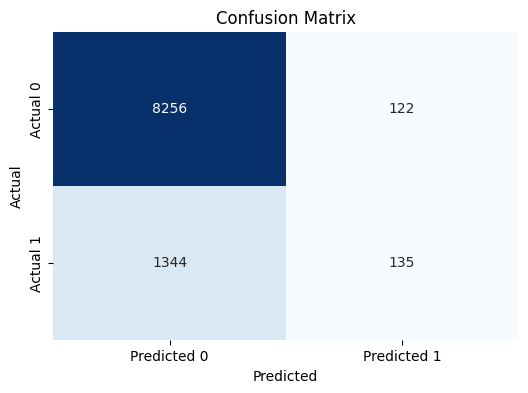

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.53      0.09      0.16      1479

    accuracy                           0.85      9857
   macro avg       0.69      0.54      0.54      9857
weighted avg       0.81      0.85      0.80      9857



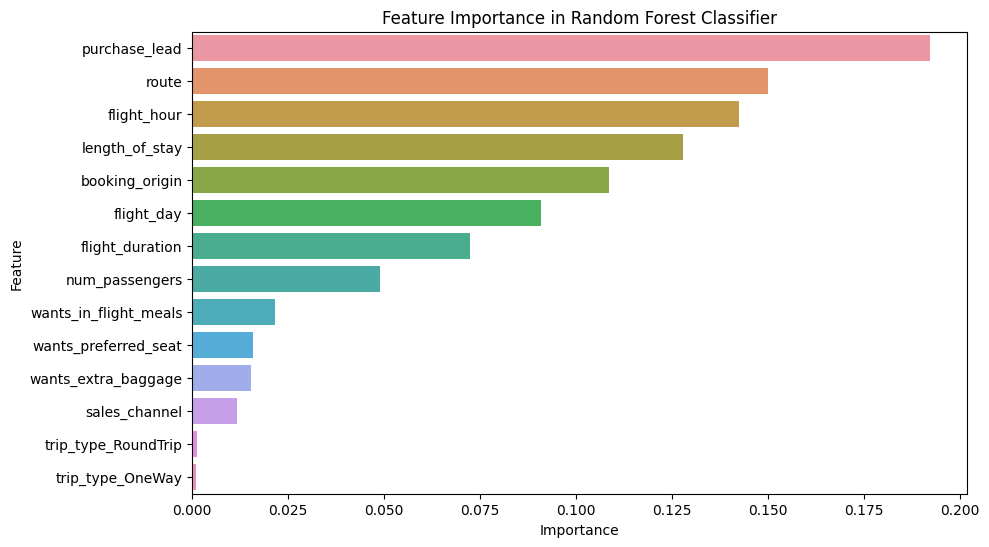

In [ ]:
# Plotting feature importance
importances = model.feature_importances_
feature_names = X.columns

# Creating a DataFrame to hold feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance in Random Forest Classifier")
plt.show()
